In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.python.keras import layers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Activation, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, MaxPooling2D
from keras_preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

In [2]:
#!unzip archive.zip
PATH = '../afhq'

In [3]:
# Dataset: https://github.com/clovaai/stargan-v2

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'val')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 10
IMG_HEIGHT = 200
IMG_WIDTH = 200

In [4]:
train_image_generator      = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator       = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory('../afhq/train', batch_size = batch_size, target_size =(IMG_HEIGHT,IMG_WIDTH), class_mode = 'binary')
val_data_gen = validation_image_generator.flow_from_directory('../afhq/val', batch_size = batch_size, target_size =(IMG_HEIGHT,IMG_WIDTH), class_mode = 'binary')
test_data_gen = test_image_generator.flow_from_directory('../afhq/test', batch_size = batch_size, target_size =(IMG_HEIGHT,IMG_WIDTH), class_mode = 'binary', classes = ['.'], shuffle = False)

Found 11488 images belonging to 2 classes.
Found 2300 images belonging to 2 classes.
Found 90 images belonging to 1 classes.


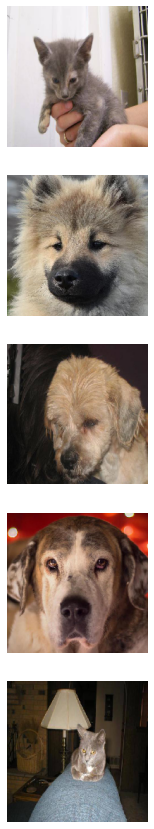

In [5]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

#sample_training_images, _ = next(train_data_gen)
#plotImages(sample_training_images[:5])
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [6]:
train_image_generator = ImageDataGenerator(rescale=1./255, horizontal_flip=True,rotation_range=15,zoom_range=0.2,width_shift_range=0.1,height_shift_range=0.1,shear_range=10.0,fill_mode="nearest")

Found 11488 images belonging to 2 classes.


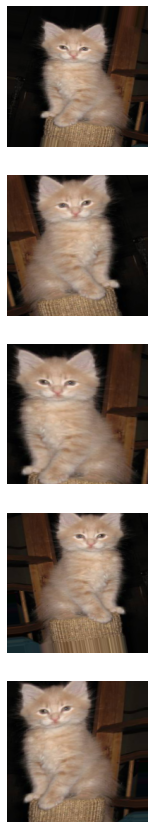

In [8]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory='../afhq/train',target_size=(IMG_HEIGHT, IMG_WIDTH),class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [9]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [10]:
model = Sequential()

model.add(Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(Conv2D(8, (3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        1

In [11]:
history = model.fit(x=train_data_gen, steps_per_epoch=8, epochs=epochs, validation_data=val_data_gen, validation_steps=8, verbose=1)

Epoch 1/10
8/8 [==============================] - 42s 5s/step - loss: 0.7334 - accuracy: 0.4787 - val_loss: 0.6353 - val_accuracy: 0.6602
Epoch 2/10
8/8 [==============================] - 37s 5s/step - loss: 0.6542 - accuracy: 0.6535 - val_loss: 0.6103 - val_accuracy: 0.6748
Epoch 3/10
8/8 [==============================] - 39s 5s/step - loss: 0.5661 - accuracy: 0.7528 - val_loss: 0.6434 - val_accuracy: 0.6484
Epoch 4/10
8/8 [==============================] - 37s 5s/step - loss: 0.5267 - accuracy: 0.7350 - val_loss: 0.6531 - val_accuracy: 0.6523
Epoch 5/10
8/8 [==============================] - 39s 5s/step - loss: 0.4615 - accuracy: 0.7815 - val_loss: 0.5665 - val_accuracy: 0.7246
Epoch 6/10
8/8 [==============================] - 37s 5s/step - loss: 0.4173 - accuracy: 0.8188 - val_loss: 0.5924 - val_accuracy: 0.7061
Epoch 7/10
8/8 [==============================] - 40s 5s/step - loss: 0.4286 - accuracy: 0.7929 - val_loss: 0.5589 - val_accuracy: 0.7090
Epoch 8/10
8/8 [==================

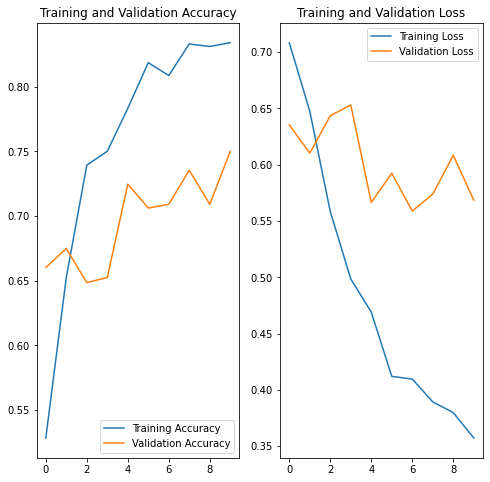

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
probabilities = model.predict(test_data_gen, steps=89)
probabilities = [i[0] for i in probabilities]

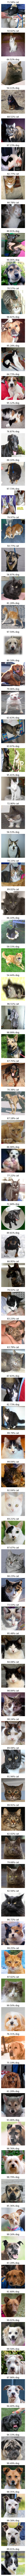

In [14]:
plotImages(test_data_gen[0][0], probabilities = probabilities)

In [15]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,]
correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 80.0% of the images of cats and dogs.
You passed the challenge!
